#### Определите AUC_ROC и AUC_PR для модели         логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности

In [338]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from sklearn import datasets
from matplotlib.colors import ListedColormap

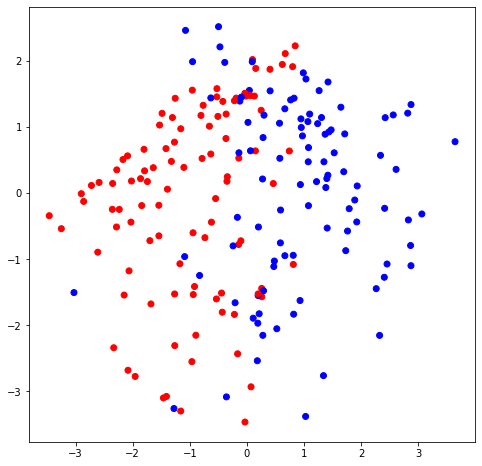

In [376]:
classes = datasets.make_classification(n_samples=200, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2)
datasets.make_blobs(centers = 2, cluster_std = 50, random_state=62)

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [359]:
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (140, 2)
Размер массива признаков тестовой выборки (60, 2)
Размер массива ответов для обучающей выборки (140,)
Размер массива ответов для тестовой выборки (60,)


In [360]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, target):
        for i in range(self.n_iterations):        
            grad_w, grad_w0 = self._log_grad(X, target)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, target):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, target)
    def predict_proba(self, X):  
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [361]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test = mod.predict(X_test)

In [362]:
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    
    precision = round(TP / (TP+FP),3)
    recall  = round(TP / (TP+FN),3)
    TPR = round(TP / (TP+FN),3)
    FPR = round(FP / (FP+TN),3)
    
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN, 'precision': precision, 'recall': recall, 'TPR': TPR, 'FPR': FPR}

In [363]:
cofusion_fixed=confusion(mod.predict(X_test, 0.5), y_test)
cofusion_fixed

{'TP': 27,
 'FP': 3,
 'FN': 8,
 'TN': 22,
 'precision': 0.9,
 'recall': 0.771,
 'TPR': 0.771,
 'FPR': 0.12}

In [364]:
proba=mod.predict_proba(X_test)
for p in np.unique(proba):
    print(f'Для порога по вероятности {round(p, 3)} на тестовой выборке имеем:{confusion(mod.predict(X_test, p), y_test)}')

Для порога по вероятности 0.371 на тестовой выборке имеем:{'TP': 35, 'FP': 24, 'FN': 0, 'TN': 1, 'precision': 0.593, 'recall': 1.0, 'TPR': 1.0, 'FPR': 0.96}
Для порога по вероятности 0.377 на тестовой выборке имеем:{'TP': 34, 'FP': 24, 'FN': 1, 'TN': 1, 'precision': 0.586, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.96}
Для порога по вероятности 0.387 на тестовой выборке имеем:{'TP': 34, 'FP': 23, 'FN': 1, 'TN': 2, 'precision': 0.596, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.92}
Для порога по вероятности 0.394 на тестовой выборке имеем:{'TP': 34, 'FP': 22, 'FN': 1, 'TN': 3, 'precision': 0.607, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.88}
Для порога по вероятности 0.405 на тестовой выборке имеем:{'TP': 34, 'FP': 21, 'FN': 1, 'TN': 4, 'precision': 0.618, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.84}
Для порога по вероятности 0.417 на тестовой выборке имеем:{'TP': 34, 'FP': 20, 'FN': 1, 'TN': 5, 'precision': 0.63, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.8}
Для порога по вероятности 0.428 на тесто

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [365]:
order=np.argsort(proba)
target=y_test[order]
x=proba[order]
bins_pos=target
bins_neg=1-target
num_pos, num_neg=np.sum(bins_pos), np.sum(bins_neg)
TPR=np.concatenate([[0], np.cumsum(bins_neg)/num_neg])
FPR=np.concatenate([[0], np.cumsum(bins_pos)/num_pos])

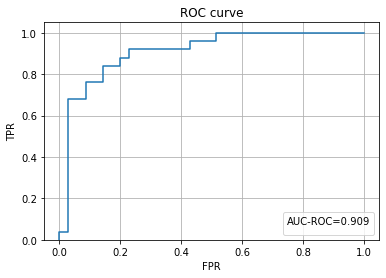

In [366]:
AUC_ROC = np.sum((FPR[1:]-FPR[:-1])*(TPR[1:]+TPR[:-1])/2)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR)

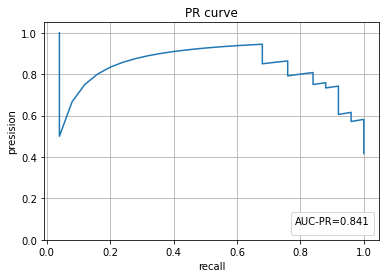

In [367]:
precision=np.cumsum(bins_neg)/(np.cumsum(bins_neg)+np.cumsum(bins_pos))
recall = TPR
AUC_PR = np.sum(precision*(recall[1:]-recall[:-1]))

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)

#### Получите такие же характеристики для линейной регрессии и сравните две модели.

In [368]:
class linear_regression:
    def __init__(self, eta = 0.005, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
    def predict_proba(self, X):  
        score=X.dot(self.w.T).flatten()+self.w0
        return score
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)

In [369]:
lin_mod=linear_regression()
lin_mod.fit(X_train, y_train)
lin_predicted = lin_mod.predict(X_test)

In [370]:
cofusion_fixed_linear=confusion(lin_mod.predict(X_test, 0.5), y_test)
cofusion_fixed_linear

{'TP': 27,
 'FP': 3,
 'FN': 8,
 'TN': 22,
 'precision': 0.9,
 'recall': 0.771,
 'TPR': 0.771,
 'FPR': 0.12}

In [371]:
lin_proba=lin_mod.predict_proba(X_test)
for p in np.unique(lin_proba):
    print(f'Для порога по вероятности {round(p, 3)} на тестовой выборке имеем:{confusion(lin_mod.predict(X_test, p), y_test)}')

Для порога по вероятности -0.301 на тестовой выборке имеем:{'TP': 35, 'FP': 24, 'FN': 0, 'TN': 1, 'precision': 0.593, 'recall': 1.0, 'TPR': 1.0, 'FPR': 0.96}
Для порога по вероятности -0.231 на тестовой выборке имеем:{'TP': 34, 'FP': 24, 'FN': 1, 'TN': 1, 'precision': 0.586, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.96}
Для порога по вероятности -0.212 на тестовой выборке имеем:{'TP': 34, 'FP': 23, 'FN': 1, 'TN': 2, 'precision': 0.596, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.92}
Для порога по вероятности -0.14 на тестовой выборке имеем:{'TP': 34, 'FP': 22, 'FN': 1, 'TN': 3, 'precision': 0.607, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.88}
Для порога по вероятности -0.088 на тестовой выборке имеем:{'TP': 34, 'FP': 21, 'FN': 1, 'TN': 4, 'precision': 0.618, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.84}
Для порога по вероятности -0.005 на тестовой выборке имеем:{'TP': 34, 'FP': 20, 'FN': 1, 'TN': 5, 'precision': 0.63, 'recall': 0.971, 'TPR': 0.971, 'FPR': 0.8}
Для порога по вероятности 0.101 на 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [372]:
lin_order=np.argsort(lin_proba)
lin_target=y_test[lin_order]
lin_x=lin_proba[lin_order]
lin_bins_pos=lin_target
lin_bins_neg=1-lin_target
lin_num_pos, lin_num_neg=np.sum(lin_bins_pos), np.sum(lin_bins_neg)
TPR_lin=np.concatenate([[0], np.cumsum(lin_bins_neg)/lin_num_neg])
FPR_lin=np.concatenate([[0], np.cumsum(lin_bins_pos)/lin_num_pos])

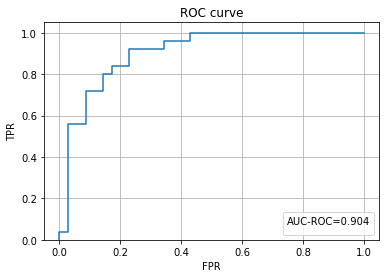

In [373]:
AUC_ROC_lin = np.sum((FPR_lin[1:]-FPR_lin[:-1])*(TPR_lin[1:]+TPR_lin[:-1])/2)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC_lin:.3f}', loc='lower right')
plt.plot(FPR_lin, TPR_lin)

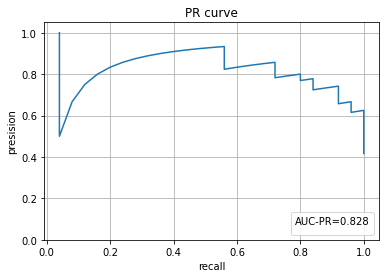

In [374]:
lin_precision=np.cumsum(lin_bins_neg)/(np.cumsum(lin_bins_neg)+np.cumsum(lin_bins_pos))
lin_recall = TPR_lin
AUC_PR_lin = np.sum(lin_precision*(lin_recall[1:]-lin_recall[:-1]))

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR_lin:.3f}', loc='lower right')
plt.plot(lin_recall[1:], lin_precision)

Для большинства из испробованных датасетов модель логистической регрессии отработала лучше линейной. Линейная тоже дает неплохие результаты, может быть, потому что данные сгенерированы таким образом, что между признаками наблюдается линейная зависимость и классы возможно приблизительно разделить прямой